In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import math

import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

In [2]:
## Data Analysis is inspired by the following tutorial

## https://medium.com/analytics-vidhya/exploratory-data-analysis-of-nyc-taxi-trip-duration-dataset-using-python-257fdef2749e
## https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117

###-------> Toggle these based on user: 

os.chdir(r'D:\Projects\MobilityForecast\Repo\mobilityforecast\data')
#os.chdir(r'/Users/probook/Documents/GitHub/MobilityForecast/mobilityforecast/data')

In [3]:
df = pd.read_parquet('yellow_tripdata_2022-01.parquet',engine='pyarrow')
print(df.columns) # gives the names of the features in the dataset
df.head(5) # shows the first 5 data samples

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [4]:
df.describe() # gives the data statistics

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
std,5.021375e-01,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00


In [5]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime']) # converting the date-time to python date-time objects to access built-in methods
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [6]:
df = df.drop(columns=['store_and_fwd_flag', 'VendorID' , 'RatecodeID', 'payment_type']) # dropping the store and forward flag, VendorID is the company that provided the record(this does not add any value to our study)
df = df.dropna(axis=0) # RatecodeID and payment_type are categorical features affecting the price of the trip, we discard this for the moment as this does not add value to our study. 
df.head(5)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,142,236,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,236,42,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,166,166,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,114,68,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,68,163,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [7]:
fare_outlier_max = df['fare_amount'].mean() + (df['fare_amount'].std()*3) # calculating the the outliers,
fare_outlier_min = 0

tot_fare_outlier_max = df['total_amount'].mean() + (df['total_amount'].std()*3)
tot_fare_outlier_min = 0

trip_dist_outlier_max = df['trip_distance'].mean() + (df['trip_distance'].std()*3)
trip_dist_outlier_min = 0

In [8]:
## removing the outliers in the data..

fare_max_ind = df.index[df['fare_amount'] > fare_outlier_max].tolist() # fnding the indices of the outliers
fare_min_ind = df.index[df['fare_amount'] < fare_outlier_min].tolist()

tot_fare_max_ind = df.index[df['total_amount'] > tot_fare_outlier_max].tolist()
tot_fare_min_ind = df.index[df['total_amount'] < tot_fare_outlier_min].tolist()

trip_dist_ind_max = df.index[df['trip_distance'] > trip_dist_outlier_max].tolist()
trip_dist_ind_min = df.index[df['trip_distance'] < trip_dist_outlier_min].tolist()

passenger_count_ind = df.index[df['passenger_count'] == 0].tolist() # finding the indices of the taxi trips where there are no passengers

ind = sorted(fare_max_ind + fare_min_ind + tot_fare_max_ind + tot_fare_min_ind + trip_dist_ind_max + trip_dist_ind_min + passenger_count_ind) # accumulating all the outlier indices to filter them out
df = df.drop(ind) # remove all the outliers

In [9]:
df.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.243480e+06,2.243480e+06,2.243480e+06,2.243480e+06,2.243480e+06,2.243480e+06,2.243480e+06,2.243480e+06,2.243480e+06,2.243480e+06,2.243480e+06,2.243480e+06,2.243480e+06
mean,1.416660e+00,2.495611e+00,1.669753e+02,1.644095e+02,1.121050e+01,9.946764e-01,4.974990e-01,2.160660e+00,2.086849e-01,2.998869e-01,1.707328e+01,2.329921e+00,5.232997e-02
std,9.716232e-01,2.510830e+00,6.576633e+01,7.042651e+01,8.579302e+00,1.187390e+00,3.532945e-02,2.223124e+00,1.202095e+00,5.824565e-03,1.030985e+01,6.294981e-01,2.503479e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.010000e+00,1.320000e+02,1.130000e+02,6.500000e+00,0.000000e+00,5.000000e-01,8.300000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,1.000000e+00,1.680000e+00,1.620000e+02,1.620000e+02,8.500000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.416000e+01,2.500000e+00,0.000000e+00
75%,1.000000e+00,2.860000e+00,2.360000e+02,2.360000e+02,1.300000e+01,2.500000e+00,5.000000e-01,2.950000e+00,0.000000e+00,3.000000e-01,1.896000e+01,2.500000e+00,0.000000e+00
max,9.000000e+00,1.602000e+01,2.650000e+02,2.650000e+02,7.200000e+02,3.350000e+01,3.300000e+00,3.030000e+02,8.650000e+01,3.000000e-01,7.228000e+02,2.500000e+00,1.250000e+00


c:\Users\20215176\Anaconda3\envs\mobilityforecast\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


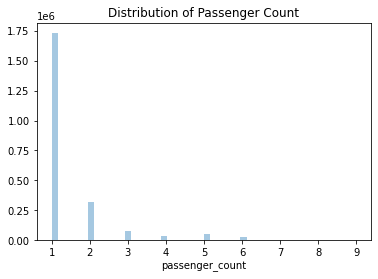

In [10]:
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

In [11]:
unique_pickup_date_time = df['tpep_pickup_datetime'].nunique() # extracting all unique days for which the data was recorded
unique_dropoff_date_time = df['tpep_dropoff_datetime'].nunique() 

In [12]:
df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name() # converting the dates to the days of the weeks for easy interpretation.
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name()

In [13]:
df['pickup_day'].value_counts() # analysing the taxi rider based on week days

Monday       337196
Saturday     331459
Friday       331434
Thursday     327723
Wednesday    311975
Sunday       306297
Tuesday      297396
Name: pickup_day, dtype: int64

In [14]:
df['dropoff_day'].value_counts() # analysing the taxi rider based on week days

Monday       337315
Saturday     331090
Friday       330580
Thursday     327056
Wednesday    311856
Sunday       307906
Tuesday      297677
Name: dropoff_day, dtype: int64

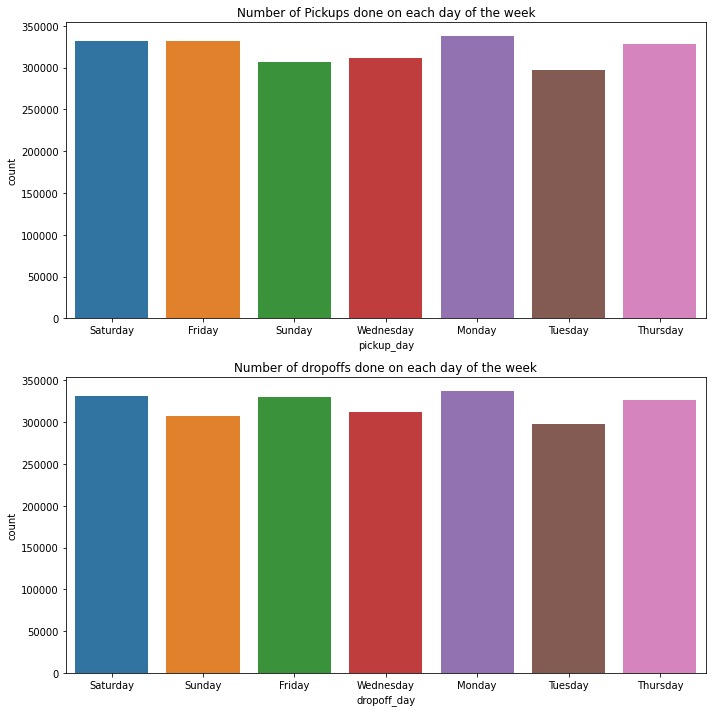

In [15]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

In [16]:
def timezone(x):
    '''
    the method takes the date and time and separates this to 
    segements called, morning, midday, evening and late night.
    '''
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['tpep_pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['tpep_dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

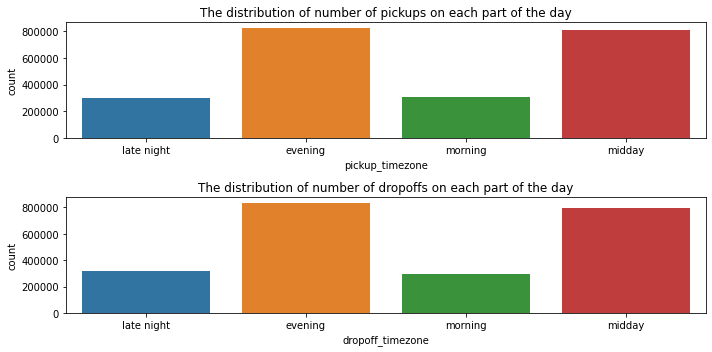

In [17]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of dropoff hours')

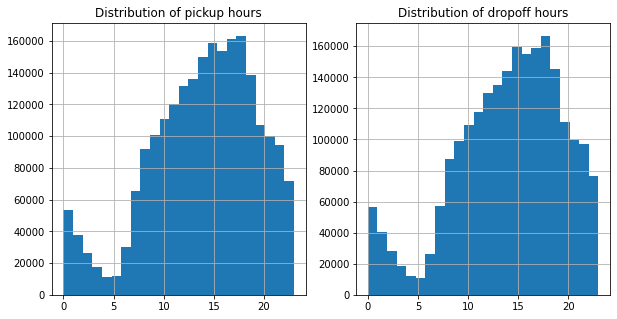

In [18]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5)) # analysing the distridf['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

c:\Users\20215176\Anaconda3\envs\mobilityforecast\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of of the Trip distance distribution')

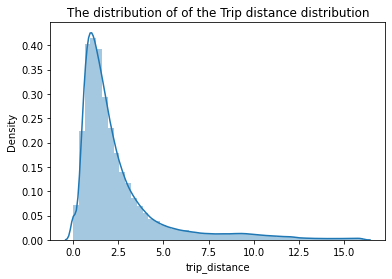

In [19]:
sns.distplot(df['trip_distance'],kde=True)
plt.title('The distribution of of the Trip distance distribution')

c:\Users\20215176\Anaconda3\envs\mobilityforecast\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of the Pick up location distribution')

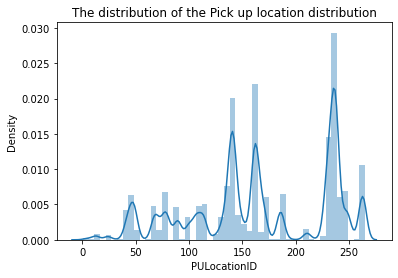

In [20]:
sns.distplot(df['PULocationID'])
plt.title('The distribution of the Pick up location distribution')

c:\Users\20215176\Anaconda3\envs\mobilityforecast\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of the Drop Off location distribution')

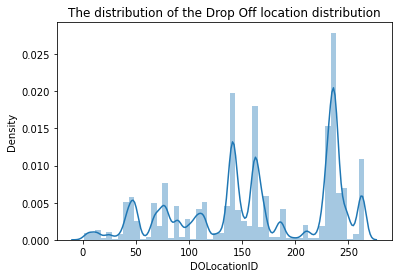

In [21]:
sns.distplot(df['DOLocationID'])
plt.title('The distribution of the Drop Off location distribution')

In [22]:
# Analysing the relationships between each of the variables with the target variable passenger count.

Text(0.5, 1.0, 'The average passenger count per PickUp Day of the week')

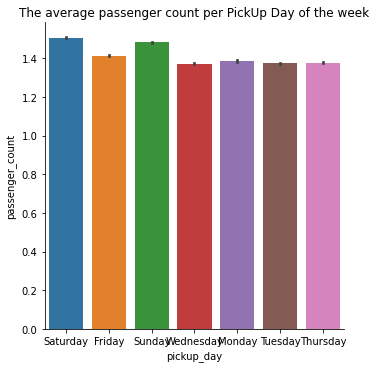

In [23]:
sns.catplot(x="pickup_day", y="passenger_count", data=df, kind="bar")
plt.title('The average passenger count per PickUp Day of the week')

Text(0.5, 1.0, 'The Average Trip Duration per Drop off Day of the week')

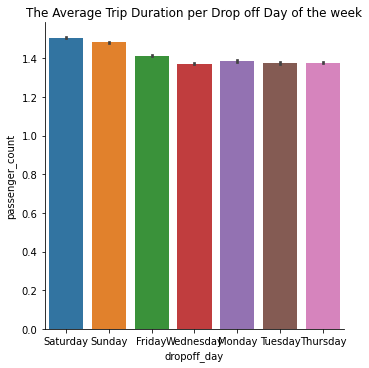

In [24]:
sns.catplot(x="dropoff_day", y="passenger_count", data=df, kind="bar")
plt.title('The Average Trip Duration per Drop off Day of the week')

In [25]:
sns.catplot(x="pickup_hour", y="passenger_count",kind="bar",data=df)
plt.title('Distribution of dropoff hours')
plt.show()

In [ ]:
sns.catplot(x="dropoff_hour", y="passenger_count",kind="bar",data=df)
plt.title('Distribution of dropoff hours')
plt.show()

In [ ]:
sns.catplot(x="passenger_count", y="DOLocationID", data=df, kind="bar")

In [ ]:
df_features = df[[ 'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID','fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee']]

In [ ]:
plt.figure(figsize=(30,35))
sns.pairplot(df_features.sample(5000))

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(20,15))

sns.heatmap(
    df_features.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

In [ ]:
df = df.drop(columns=['airport_fee'])

In [ ]:
plt.figure(figsize=(20,15))
sns.jointplot(
    x='PULocationID', 
    y='passenger_count', 
    data=df_features)

In [ ]:
plt.figure(figsize=(20,15))
sns.jointplot(
    x='DOLocationID', 
    y='passenger_count', 
    data=df_features)

In [ ]:
plt.figure(figsize=(20,15))
sns.jointplot(
    x='tip_amount', 
    y='passenger_count', 
    data=df_features)

In [ ]:
plt.figure(figsize=(20,15))
sns.jointplot(
    x='total_amount', 
    y='passenger_count', 
    data=df_features)

In [ ]:
plt.figure(figsize=(20,15))
sns.stripplot(
    x='passenger_count', 
    y='DOLocationID', 
    data=df_features, 
    linewidth=.5, 
    color='blue')

In [ ]:
plt.figure(figsize=(20,15))
sns.stripplot(
    x='passenger_count', 
    y='PULocationID', 
    data=df_features, 
    linewidth=.5, 
    color='blue')

In [ ]:
def get_lat_lon(sf):
    content = []
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        
        content.append((loc_id, x, y))
    return pd.DataFrame(content, columns=["LocationID", "longitude", "latitude"])

In [ ]:
def draw_region_map(ax, sf, heat={}):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)    
    
    reg_list={'Staten Island':1, 'Queens':2, 'Bronx':3, 'Manhattan':4, 'EWR':5, 'Brooklyn':6}
    reg_x = {'Staten Island':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'EWR':[], 'Brooklyn':[]}
    reg_y = {'Staten Island':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'EWR':[], 'Brooklyn':[]}
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=math.sqrt(min(heat.values())), vmax=math.sqrt(max(heat.values()))) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        #sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        #sm.set_array([])
        #plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8), \
        #             boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    ax.set_facecolor(ocean)
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        reg_name = rec[shp_dic['borough']]
        
        if len(heat) == 0:
            norm = mpl.colors.Normalize(vmin=1,vmax=6) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
            cm=plt.get_cmap('Pastel1')
            R,G,B,A = cm(norm(reg_list[reg_name]))
            col = [R,G,B]
        else:
            R,G,B,A = cm(norm(math.sqrt(heat[reg_name])))
            col = [R,G,B]
            
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
                
        reg_x[reg_name].append((shape.bbox[0]+shape.bbox[2])/2)
        reg_y[reg_name].append((shape.bbox[1]+shape.bbox[3])/2)
        
    for k in reg_list:
        if len(heat)==0:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), k, horizontalalignment='center', verticalalignment='center',
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)     
        else:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), "{}\n({}K)".format(k, heat[k]/1000), horizontalalignment='center', 
                     verticalalignment='center',bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)       

    # display
    limits = get_boundaries(sf)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

In [ ]:
def draw_zone_map(ax, sf, heat={}, text=[], arrows=[]):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)
    theta = np.linspace(0, 2*np.pi, len(text)+1).tolist()
    ax.set_facecolor(ocean)
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=min(heat.values()),vmax=max(heat.values())) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8),
                     boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        zone = rec[shp_dic['zone']]
        
        if len(heat) == 0:
            col = continent
        else:
            if loc_id not in heat:
                R,G,B,A = cm(norm(0))
            else:
                R,G,B,A = cm(norm(heat[loc_id]))
            col = [R,G,B]

        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        if (len(text) == 0 and rec[shp_dic['Shape_Area']] > 0.0001):
            plt.text(x, y, str(loc_id), horizontalalignment='center', verticalalignment='center')            
        elif len(text) != 0 and loc_id in text:
            #plt.text(x+0.01, y-0.01, str(loc_id), fontsize=12, color="white", bbox=dict(facecolor='black', alpha=0.5))
            eta_x = 0.05*np.cos(theta[text.index(loc_id)])
            eta_y = 0.05*np.sin(theta[text.index(loc_id)])
            ax.annotate("[{}] {}".format(loc_id, zone), xy=(x, y), xytext=(x+eta_x, y+eta_y),
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12,
                        arrowprops=dict(facecolor='black', width=3, shrink=0.05))
    if len(arrows)!=0:
        for arr in arrows:
            ax.annotate('', xy = arr['dest'], xytext = arr['src'], size = arr['cnt'],
                    arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none"))
    
    # display
    limits = get_boundaries(sf)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

In [ ]:
def get_boundaries(sf):
    lat, lon = [], []
    for shape in list(sf.iterShapes()):
        lat.extend([shape.bbox[0], shape.bbox[2]])
        lon.extend([shape.bbox[1], shape.bbox[3]])

    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    return lat_min, lat_max, lon_min, lon_max

In [ ]:
sf = shapefile.Reader(r'/Users/probook/Documents/GitHub/MobilityForecast/mobilityforecast/data/taxi_zones/taxi_zones.shp')
fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf).set_index("LocationID"), on="LocationID")
df_loc.head()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, sf)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, sf)

In [ ]:
# adding a commit message to reflect the code progress in Jira.